# HHS false negative controversy

In [1]:
(* Overload key *)
OverloadQ[key_]:= MemberQ[{state, event}, key]

In [3]:
(* Probability axioms *)
partition={False,True};
expand[proba_]:=Sum[proba[value],{value,partition}]
normalize[proba_]:=expand[proba]==1

In [7]:
(* Bayes formula *)
posterior[state_?BooleanQ,event_?BooleanQ]=prior[state]*condproba[event,state]/margproba[event];

In [9]:
(* Joint probabilities as conditionals of event given state *)
jointproba[event,value1_?BooleanQ,value2_?BooleanQ]=condproba[value1,value2]*prior[value2];
jointproba[state,value1_?BooleanQ,value2_?BooleanQ]=condproba[value2,value1]*prior[value1];

In [12]:
(* Marginal probabilities *)
margproba[key_?OverloadQ,value_?BooleanQ]=expand[proba]/. proba[other_]:>jointproba[key,value,other];

In [14]:
(* Solve for the sensitivity, marginal probability, and posterior *)
equations={normalize[prior],margproba[state,True]==prior[True]};
solutions=Solve[equations,{prior[False],condproba[True,True]}];
margproba[True]=margproba[event,True]/.solutions[[1]];
posterior[True,True]=posterior[True,True]/.solutions[[1]];

1 - condproba[False, True]
condproba[True, False] (1 - prior[True]) + (1 - condproba[False, True]) prior[True]
                     (1 - condproba[False, True]) prior[True]
-----------------------------------------------------------------------------------
condproba[True, False] (1 - prior[True]) + (1 - condproba[False, True]) prior[True]
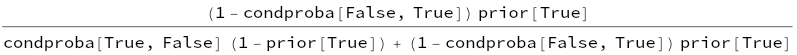

In [19]:
(* Show formulae *)
condproba[True, True] /. solutions[[1]]
margproba[True]
posterior[True, True]

↳Notice how the marginal probability depends on both the false positive and false negative rates.

(1 - falsenegrate) prevalence
-------------------------------------------------------------
falseposrate (1 - prevalence) + (1 - falsenegrate) prevalence
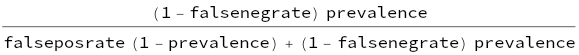

In [23]:
(*In words*)
posterior[True,True]/. {condproba[False,True]->"falsenegrate", condproba[True,False]->"falseposrate",prior[True]->"prevalence"}